In [1]:
import json
import logging
from pathlib import Path

In [2]:
import yaml

In [20]:
from docling.document_converter import DocumentConverter
# from docling.datamodel.pipeline_options import 
# from docling.pipeline import TesseractImagePipeline
from docling.datamodel.base_models import InputFormat



In [4]:
_log = logging.getLogger(__name__)

In [24]:
from docling import document_converter

# Initialize the converter
doc_converter = document_converter.DocumentConverter()

# Load your invoice image
invoice_path = "./1000036757.jpg"
parsed_data = doc_converter.convert(invoice_path)

print(parsed_data)

for res in parsed_data:
        out_path = Path("scratch")
        print(
            f"Document {res.input.file.name} converted."
            f"\nSaved markdown output to: {out_path!s}"
        )
        _log.debug(res.document._export_to_indented_text(max_text_len=16))
        # Export Docling document format to markdowndoc:
        with (out_path / f"{res.input.file.stem}.md").open("w") as fp:
            fp.write(res.document.export_to_markdown())

# Output the results
print(parsed_data)

/Users/anuragsharma/.pyenv/versions/python-play/lib/python3.11/site-packages/torch/utils/data/dataloader.py:684: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


input=InputDocument(file=PurePosixPath('1000036757.jpg'), document_hash='0bef551557cd5bf92cabd793f8d2f3ecaa366c14c4ad5d3a643928244a9c9302', valid=True, limits=DocumentLimits(max_num_pages=9223372036854775807, max_file_size=9223372036854775807, page_range=(1, 9223372036854775807)), format=<InputFormat.IMAGE: 'image'>, filesize=2469360, page_count=1) status=<ConversionStatus.SUCCESS: 'success'> errors=[] pages=[Page(page_no=0, size=Size(width=4000.0, height=2252.0), parsed_page=SegmentedPdfPage(dimension=PdfPageGeometry(angle=0.0, rect=BoundingRectangle(r_x0=0.0, r_y0=0.0, r_x1=4000.0, r_y1=0.0, r_x2=4000.0, r_y2=2252.0, r_x3=0.0, r_y3=2252.0, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), boundary_type=<PdfPageBoundaryType.CROP_BOX: 'crop_box'>, art_bbox=BoundingBox(l=0.0, t=2252.0, r=4000.0, b=0.0, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), bleed_bbox=BoundingBox(l=0.0, t=2252.0, r=4000.0, b=0.0, coord_origin=<CoordOrigin.BOTTOMLEFT: 'BOTTOMLEFT'>), crop_bbox=Bounding

AttributeError: 'tuple' object has no attribute 'input'

In [35]:
pip install python-doctr



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 6.3 MB/s eta 0:00:00
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 28.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.1/270.1 kB 15.6 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 32.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 6.3 MB/s eta 0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Image loaded successfully


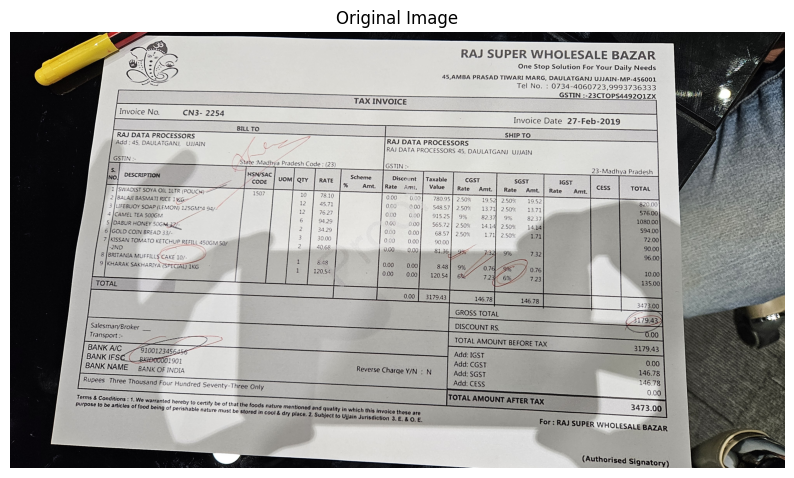

Running OCR...
OCR completed successfully
OCR results saved to ocr_output.json


TypeError: Image data of dtype object cannot be converted to float

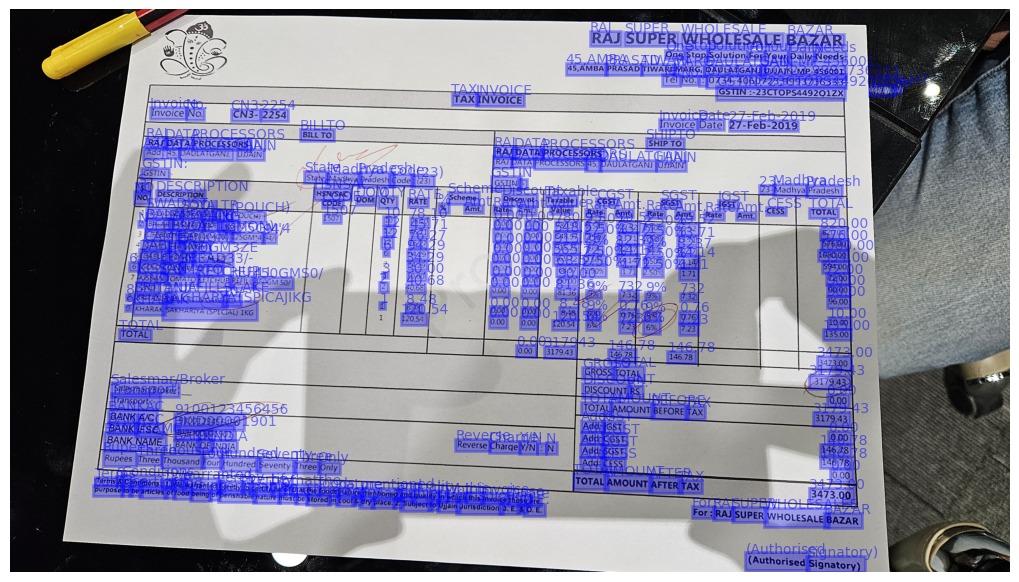

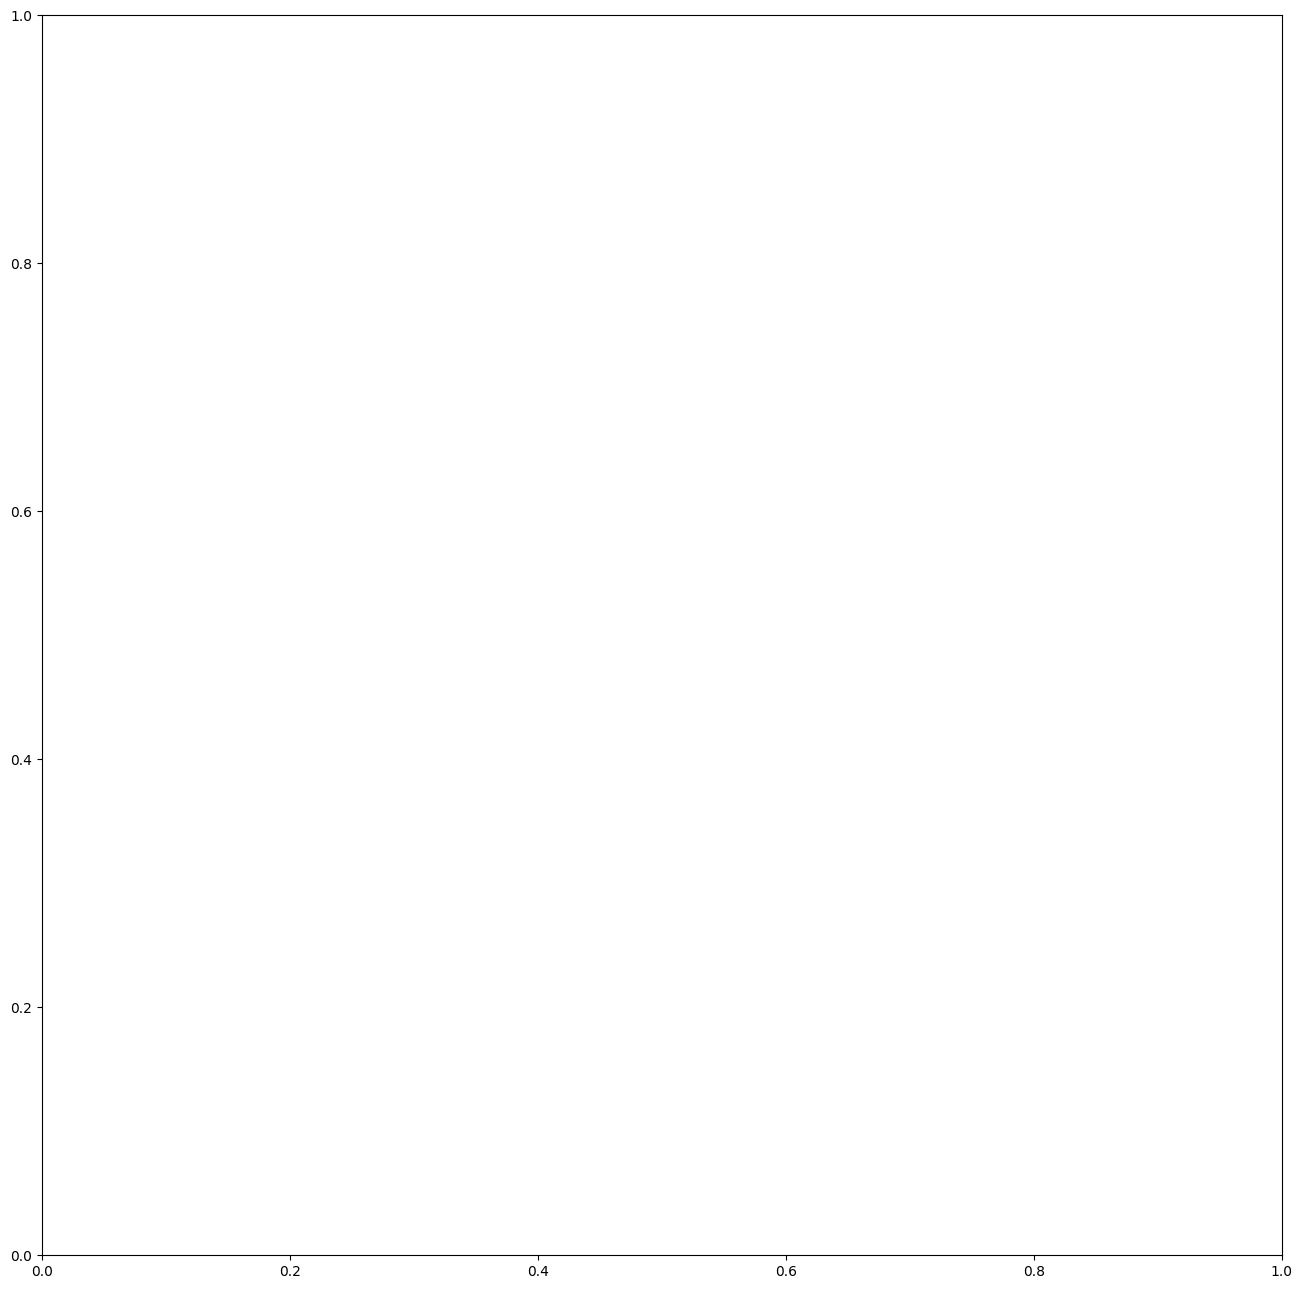

In [68]:
import re
from doctr.io import DocumentFile
from doctr.models import ocr_predictor
import matplotlib.pyplot as plt
import json
from pathlib import Path
from PIL import Image
import numpy as np

def load_and_validate_image(image_path):
    """Load and validate image file"""
    if not Path(image_path).exists():
        raise FileNotFoundError(f"Image file '{image_path}' does not exist.")
    
    try:
        # Try opening with PIL first to validate image
        with Image.open(image_path) as img:
            img.verify()  # Verify that it's a valid image file
        return DocumentFile.from_images(image_path)
    except Exception as e:
        raise ValueError(f"Failed to load image: {str(e)}")

# Load model with pretrained weights
try:
    model = ocr_predictor(
        det_arch='db_resnet50',
        reco_arch='crnn_vgg16_bn',
        assume_straight_pages=True,
        pretrained=True
    )
except Exception as e:
    raise RuntimeError(f"Failed to load OCR model: {str(e)}")

# Load and validate image
image_path = "./2.jpg"
try:
    doc = load_and_validate_image(image_path)
    print("Image loaded successfully")
except Exception as e:
    print(f"Error loading image: {e}")
    exit(1)

# Display original image
plt.figure(figsize=(10, 10))
plt.imshow(np.array(doc[0]))  # Convert to numpy array for display
plt.title("Original Image")
plt.axis("off")
plt.show()

# Perform OCR
try:
    print("Running OCR...")
    result = model(doc)
    print("OCR completed successfully")
except Exception as e:
    print(f"Error during OCR processing: {e}")
    exit(1)

# Get structured OCR output
ocr_output = result.export()

# Save full JSON output
try:
    with open("ocr_output.json", "w") as f:
        json.dump(ocr_output, f, indent=2)
    print("OCR results saved to ocr_output.json")
except Exception as e:
    print(f"Error saving JSON output: {e}")

from doctr.utils.visualization import visualize_page
import numpy as np

# Recreate visualization with custom parameters
page_data = ocr_output["pages"][0]  # Get first page data

# Visualize with original image
original_img = np.array(doc[0])
vis_img = visualize_page(
    page_data, 
    original_img,
    interactive=False,
)

plt.figure(figsize=(16, 20))
plt.imshow(vis_img)
plt.axis('off')
plt.show()

# Show visual result
try:
    synthetic_pages = result.synthesize()
    output_img_path = "ocr_visualization_highres.png"
    plt.figure(figsize=(16, 20), dpi=300)  # High DPI for better quality
    plt.imshow(synthetic_pages[0])
    plt.axis("off")
    plt.savefig(output_img_path, bbox_inches='tight', pad_inches=0.1)
    plt.close()  # Don't display inline
    print(f"High-res visualization saved to {output_img_path}")
except Exception as e:
    print(f"Error displaying results: {e}")